# SARSA$(\lambda)$ on Mountain Car

Figure 12.10 (left) shows results with SARSA$(\lambda)$ on the Mountain Car task introduced in Example 10.1.
- The function approximation, action selection, and environmental details were exactly as in Chapter 10, and thus it is appropriate to numerically compare these results with the Chapter 10 results for $n$-step SARSA (right side of the figure).
- The earlier results varied the update length $n$ whereas here for SARSA$(\lambda)$ we vary the trace parameter $\lambda$, which plays a similar role.
- The fading-trace bootstrapping strategy of SARSA$(\lambda)$ appears to result in more efficient learning on this problem.

In [1]:
from IPython.display import Image

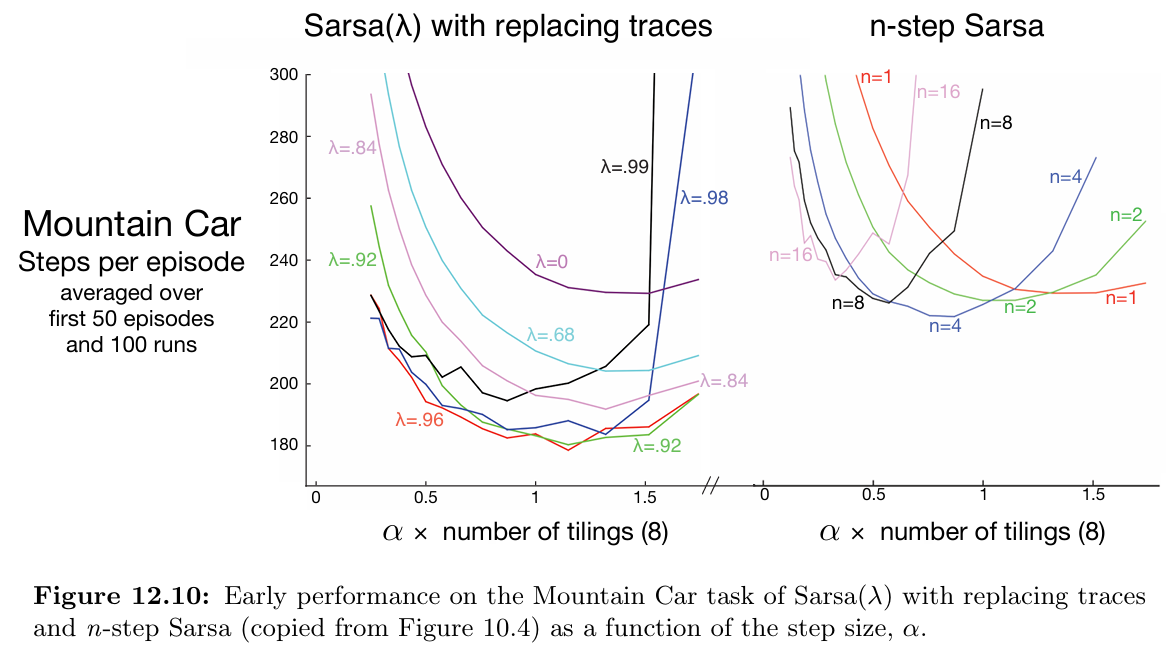

In [2]:
Image(filename="../book_images/Figure_12_10.PNG")

Effect of the $\lambda$ and $\alpha$ on early performance of SARSA$(\lambda)$

In [ ]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from tqdm import tqdm

matplotlib.use('Agg')

In [ ]:
from src.mountain_car import accumulating_trace, dutch_trace, replacing_trace, replacing_trace_with_clearing, SARSA, play, step_limit

In [ ]:
# Number of runs
runs = 30

# Number of episodes
episodes = 50

In [ ]:
# Step-size parameters
step_sizes = np.arange(1, 8) / 4.0

# Trace-decay parameters
trace_decays = [0.99, 0.95, 0.5, 0]

# Create a 4D tensor for steps numbers filled with 0s
steps = np.zeros((len(trace_decays), len(step_sizes), runs, episodes))

In [ ]:
# For every trace-decay parameter
for lambda_index, trace_decay in enumerate(trace_decays):
    # for every step-size parameter
    for alpha_index, step_size in enumerate(step_sizes):
        # for every run
        for run in tqdm(range(runs)):
            # create evaluator object
            evaluator = SARSA(step_size, trace_decay, replacing_trace)
            
            # for every episode
            for episode in range(episodes):
                # play for 1 episode and get steps number
                step = play(evaluator)
                
                # record steps number in 4D tensor
                steps[lambda_index, alpha_index, run, episode] = step

In [ ]:
# Average over episodes
steps = np.mean(steps, axis=3)

# Average over runs
steps = np.mean(steps, axis=2)

In [ ]:
# Plotting
for lambda_index, trace_decay in enumerate(trace_decays):
    plt.plot(step_sizes, steps[lambda_index, :], label=fr"$\lambda = {trace_decay}$")

plt.title(r"SARSA$(\lambda)$ with replacing traces")
plt.xlabel(r"$\alpha$ * number of tilings (8)")
plt.ylabel(f"Steps per episode averaged over first {episodes} episodes and {runs} runs")
plt.ylim([180, 300])
plt.legend()

In [ ]:
plt.savefig("../generated_images/figure_12_10.png")
plt.close()

Figure 12.11 compares the performance of various versions of SARSA$(\lambda)$ on the Mountain Car example.

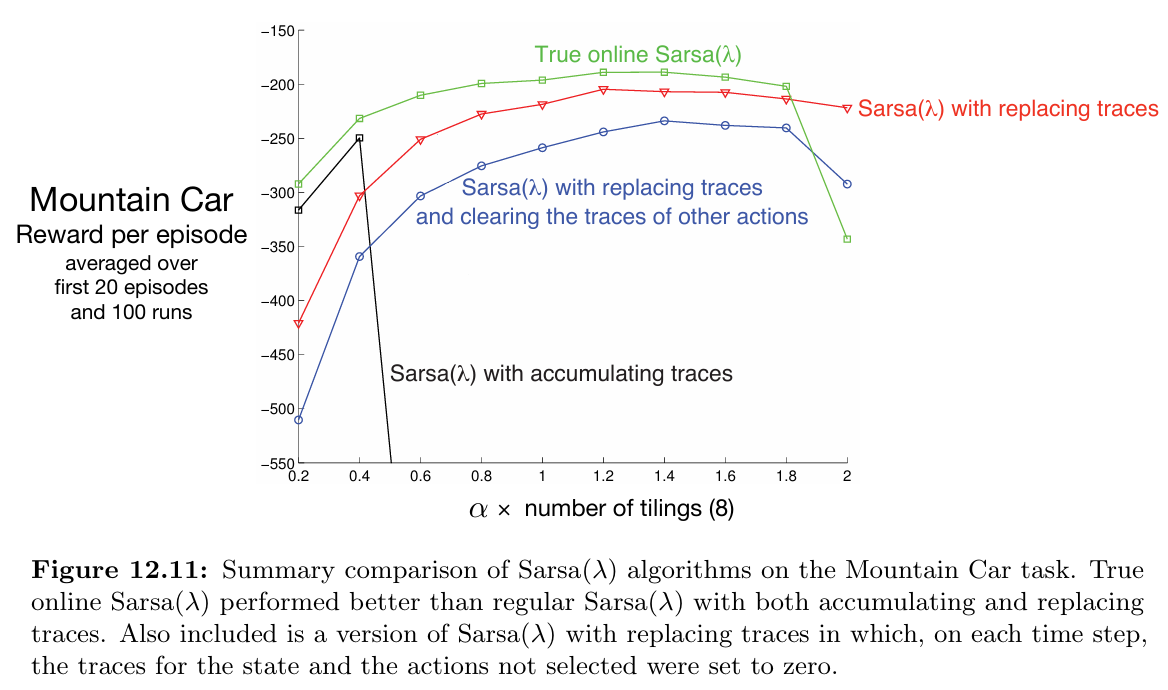

In [3]:
Image(filename="../book_images/Figure_12_11.PNG")

In [ ]:
# Eligibility trace types
trace_types = [dutch_trace, replacing_trace, replacing_trace_with_clearing, accumulating_trace]

# Step-size parameters
step_sizes = np.arange(0.2, 2.2, 0.2)

# Number of episodes
episodes = 20

In [ ]:
# Number of runs
runs = 30

# Trace-decay parameter
trace_decay = 0.9

# Create a 4D tensor for rewards filled with 0s
rewards = np.zeros((len(trace_types), len(step_sizes), runs, episodes))

In [ ]:
# For every trace type
for trace_index, trace_type in enumerate(trace_types):
    # for every step-size parameter
    for alpha_index, step_size in enumerate(step_sizes):
        # for every run
        for run in tqdm(range(runs)):
            # create evaluator object
            evaluator = SARSA(step_size, trace_decay, trace_type)
            
            # for every episode
            for episode in range(episodes):
                # if ET is accumulating trace and 𝛼 > 0.6
                if trace_type == accumulating_trace and step_size > 0.6:
                    # step limit is exceeded
                    steps = step_limit
                else:
                    # play for 1 episode and get steps number
                    steps = play(evaluator)
                
                # record negative steps number in 4D tensor
                rewards[trace_index, alpha_index, run, episode] = -steps

In [ ]:
# Average over episodes
rewards = np.mean(rewards, axis=3)

# Average over runs
rewards = np.mean(rewards, axis=2)

In [ ]:
# Plotting
for trace_index, trace_type in enumerate(trace_types):
    plt.plot(step_sizes, rewards[trace_index, :], label=fr"SARSA$(\lambda)$ with {trace_type.__name__}")

plt.xlabel(r"$\alpha$ * number of tilings (8)")
plt.ylabel(f"Reward per episode averaged over first {episodes} episodes and {runs} runs")
plt.ylim([-550, -150])
plt.legend()

In [ ]:
plt.savefig("../generated_images/figure_12_11.png")
plt.close()